#Project 1 - Classification Multi-layer Perceptron
Aman Patel

CSCI-B 455

February 21, 2021

# **Introduction**

## Problem Statement
The goal for this project was to create a Multi-layer Perceptron model including a Back Propagation algorithm to classify wines based on chemical properties.



## Data

The dataset used for this project was collected from the UC Irvine Machine Learning Repository. It contained the results of chemical analyses of three different wines grown in the same region of Italy. Each data vector had an integer label (1 to 3) and 13 continuous attributes representing the wine's chemical composition. The data can be found at https://archive.ics.uci.edu/ml/datasets/wine

## Constructing the Model
The model was constructed using the design recipe for MLP models from *Machine Learning: An Algorithmic Perspective.* The recipe consists of six steps:


1.   Select inputs and outputs
2.   Normalize inputs
3.   Split the data into training, testing, and validation sets
4.   Select a network architecture
5.   Train the network
6.   Test the network



## Splitting the Data

The data were split using the 5-fold cross validation procedure given in the project description. First, the data were shuffled and divided into five equal-sized groups. For each model, one of these groups was selected as the testing set and the remaining groups were merged to form the training set.

## Selecting a Network Architecture

The model contains one hidden layer with ten neurons and an output layer with three neurons, one for each class. A hidden layer was used to improve the complexity of the model. With ten neurons, the hidden layer had more neurons than the output layer, but fewer neurons than the input vectors. A sigmoidal activation function was chosen for the hidden layer because it follows all the criteria given in *MLAP* and its derivative is simple for use in error calculations. The softmax activation function was chosen for the output layer because it is commonly used in multi-class classification problems. It is especially useful when multiple labels need to be returned, as it outputs the probability of each class.

## Training the Network

The model was trained using a feed-forward, back-propagation approach. Back-propagation is used to gradually edit the weights of a neural network to minimize error.

#### Feed-forward
To begin, the weights were initialized with random values from 0 to 1. Next, the hidden layer neurons were calculated by multiplying the input values by their respective weights. After adding bias to each neuron, the hidden layer neurons were activated by a sigmoid function. The output layer neurons were calculated similarly, but were activated by the softmax function.

#### Back-propagation
The error of the output neurons was calculated using the partial derivative of the softmax function. This was used in conjunction with the hidden layer neurons and learning rate to update the secondary weights. A learning rate of 0.01 was chosen for these models to minimize overshooting the minimum while learning at a reasonable pace. The updated secondary weights were used to calculate the error of hidden layer neurons, which was then used to update the primary weights.

#### Iterating

Once back-propagation completed for an input vector, feed-forward began for the next vector. Each time the set of input vectors was finished, the data were reshuffled and sent through the model to continue training.

## Testing the Network

To test the models, each testing set was run through their respective model once, and the accuracy was calculated and returned. This function bears a striking resemblance to the training function, but it did not perform back-propagation after softmax activation. Instead, the label of the output neuron with the maximum value was compared to the target label. 

# **Code**

Imported random, time, and math packages.

In [1]:
import random
from math import exp
import time

Converted the input file into a usable format and normalized the input vectors.

In [3]:
def processInput():
    file = open('wine.data', 'r')
    contents = file.readlines()
    file.close()
    cleaned = []
    # remove excess characters and convert to usable number format
    for i in contents:
        temp = i.rstrip('\n')
        row = temp.split(',')
        for j in range(0, len(row)):
            if j == 0:
                row[j] = int(row[j])
            else:
                row[j] = float(row[j]) 
        cleaned.append(row)

    # normalize the input vectors
    for i in range(1, 14):
        max_ = -1000000000
        min_ = 1000000000
        for j in range(0, len(cleaned)):
            if cleaned[j][i] > max_:
                max_ = cleaned[j][i]
            if cleaned[j][i] < min_:
                min_ = cleaned[j][i]
        for j in range(0, len(cleaned)):
            temp = cleaned[j][i]
            cleaned[j][i] = (temp - min_) / (max_ - min_)
    return cleaned

Created a baseline model that randomly guesses the classification, regardless of the input attributes. Its accuracy is calculated and returned.

In [4]:
def baselineModel(data):
    # baseline model randomly outputs an integer from 1 to 3, regardless of the input attributes
    random.shuffle(data)
    correctCount = 0
    for i in range(0, len(data)):
        rand = random.randint(1, 3)
        if rand == data[i][0]:
            correctCount += 1
    percent = correctCount * 100 / len(data)
    text = f"{percent:.2f}" + "%"
    return text

Created a Multi-layer Perceptron model with one hidden layer of ten neurons and an output layer of three neurons. The data were divided randomly using 5-fold cross validation and the models were trained sequentially, resetting the neurons between iterations. The accuracy of each model was calculated and the average accuracy was returned.

In [6]:
def MLP(data):
    # initialize the weights
    v = []
    for i in range(0, 13):
        row = []
        for j in range(0, 10):
            row.append(random.random())
        v.append(row)
    w = []
    for i in range(0, 10):
        row = []
        for j in range(0, 3):
            row.append(random.random())
        w.append(row)
    # shuffle the data prior to separation into 5 sets of train/test data
    random.shuffle(data)
    acc_sum = 0
    train1 = data[35:]
    test1 = data[:35]
    # train the model and return the weight matrices
    v, w = train(train1, v, w, 1)
    acc_sum += test(test1, v, w)
    train2 = data[:35]
    train2.extend(data[70:])
    test2 = data[35:70]
    # reset the weight vectors, retrain, and test
    v = []
    for i in range(0, 13):
        row = []
        for j in range(0, 10):
            row.append(random.random())
        v.append(row)
    w = []
    for i in range(0, 10):
        row = []
        for j in range(0, 3):
            row.append(random.random())
        w.append(row)
    v, w = train(train2, v, w, 2)
    acc_sum += test(test2, v, w)
    train3 = data[:70]
    train3.extend(data[106:])
    test3 = data[70:106]
    v = []
    for i in range(0, 13):
        row = []
        for j in range(0, 10):
            row.append(random.random())
        v.append(row)
    w = []
    for i in range(0, 10):
        row = []
        for j in range(0, 3):
            row.append(random.random())
        w.append(row)
    v, w = train(train3, v, w, 3)
    acc_sum += test(test3, v, w)
    train4 = data[:106]
    train4.extend(data[142:])
    test4 = data[106:142]
    v = []
    for i in range(0, 13):
        row = []
        for j in range(0, 10):
            row.append(random.random())
        v.append(row)
    w = []
    for i in range(0, 10):
        row = []
        for j in range(0, 3):
            row.append(random.random())
        w.append(row)
    v, w = train(train4, v, w, 4)
    acc_sum += test(test4, v, w)
    train5 = data[:142]
    test5 = data[142:]
    v = []
    for i in range(0, 13):
        row = []
        for j in range(0, 10):
            row.append(random.random())
        v.append(row)
    w = []
    for i in range(0, 10):
        row = []
        for j in range(0, 3):
            row.append(random.random())
        w.append(row)
    v, w = train(train5, v, w, 5)
    acc_sum += test(test5, v, w)
    # return the average accuracy of the MLP
    percent = acc_sum * 100 / 5
    text = f"{percent:.2f}" + "%"
    return text

Trained the MLP model using feed-forward and back propagation algorithms. Each model was trained for 120 seconds, then tested using the remaining data.

In [8]:
def train(data, v, w, num):
    print("Start training MLP model", num)
    # 120 seconds of training per set of train/test data
    t_end = time.time() + 120
    while time.time() < t_end:
        # randomly shuffle the data between training sessions
        random.shuffle(data)
        for x in data:
            # initialize hidden and output layers
            a = []
            hj = []
            hk = []
            for i in range(0, 3):
                hk.append(0)
            for i in range(0, 10):
                a.append(0)
                hj.append(0)
            for j in range(0, 10):
                for i in range(1, len(x)):
                    # calculate components of hidden layer neurons based on initial weights and input vector
                    h = x[i]*v[i-1][j]
                    hj[j] = hj[j] + h
                # add bias to each hidden layer neuron
                hj[j] += 1
                # apply sigmoid activation to each hidden layer neuron
                a[j] = activation(hj[j])
            for j in range(0, 3):
                for i in range(0, 10):
                    # calculate components of output layer neurons based on secondary weights and hidden layer
                    h = a[i]*w[i][j]
                    hk[j] = hk[j] + h
                # add bias to each output layer neuron
                hk[j] += 1
            # apply softmax activation to the output layer
            y = softmax(hk)
            error_o = []
            # calculate error for each output layer neuron
            for k in range(0, len(y)):
                error_o.append(find_error_output(y, x, k))
            # update secondary weights based on error
            w = update_output(w, error_o, 0.01, a)
            error_h = []
            # calculate error for each hidden layer neuron
            for z in range(0, len(w)):
                error_h.append(find_error_hidden(error_o, w, a, z))
            # update primary weights based on error
            v = update_hidden(v, error_h, 0.01, x)
    return v, w

Activated hidden layer neurons using the sigmoid activation function.



In [12]:
def activation(value):
    # sigmoid activation used on each node in hidden layer
    return 1 / (1 + exp(-1 * value))

Activated output layer neurons using the softmax activation function.

In [13]:
def softmax(hk):
    # softmax activation used on output layer vector
    sum_ = 0
    for i in range(0, len(hk)):
        sum_ += exp(hk[i])
    y = []
    for i in range(0, len(hk)):
        val = exp(hk[i]) / sum_
        y.append(val)
    return y

Calculated the error for each output neuron, then updated the secondary weights accordingly.

In [10]:
def find_error_output(y, x, k):
    # value of tk depends on if classification was correct 
    if k+1 == x[0]:
        tk = 1
    else:
        tk = 0
    # error for softmax found in lecture slides
    return (y[k]-tk) * y[k] * (1-y[k])

def update_output(w, error_o, learnRate, a):
    # update secondary weights using secondary weights, output error, arbitrary learning rate, and hidden layer vector
    for i in range(0, len(w)):
        for j in range(0, len(w[0])):
            w[i][j] = w[i][j] - (learnRate * error_o[j] * a[i])
    return w

Calculated the error for each hidden layer neuron using the updated secondary weights and updated the primary weights accordingly.

In [11]:
def find_error_hidden(error_o, w, a, z):
    # error for hidden layer based on derivative of sigmoid function
    weight_sum = 0
    for i in range(0, len(error_o)):
        weight_sum += error_o[i] * w[z][i]
    return a[z] * (1-a[z]) * weight_sum

def update_hidden(v, error_h, learnRate, x):
    # update primary weights using initial weights, hidden error, arbitrary learning rate, and input vector
    for i in range(0, len(v)):
        for j in range(0, len(v[0])):
            v[i][j] = v[i][j] - (learnRate * error_h[j] * x[i + 1])
    return v

Tested the models against the remaining data after training finished. The accuracy of each model was recorded, the average accuracy was calculated, and the accuracy was returned.

In [14]:
def test(data, v, w):
    correctCount = 0
    # runs through the same feed forward process used in training
    for x in data:
        a = []
        hj = []
        hk = []
        for i in range(0, 3):
            hk.append(0)
        for i in range(0, 10):
            a.append(0)
            hj.append(0)
        for j in range(0, 10):
            for i in range(1, len(x)):
                 h = x[i]*v[i-1][j]
                 hj[j] = hj[j] + h
            a[j] = activation(hj[j])
        for i in range(0, 10):
            for j in range(0, 3):
                 h = a[i]*w[i][j]
                 hk[j] = hk[j] + h
        y = softmax(hk)
        # instead of calculating error, the index of the max value of y is found
        # this index is compared to the actual classification of the input vector
        for i in range(0, len(y)):
            if y[i] == max(y):
                if x[0] == (i + 1):
                    correctCount += 1
    percent = correctCount * 100 / len(data)
    text = f"{percent:.2f}" + "%"
    print("Accuracy:", text)
    return correctCount / len(data)

def main():
    data = processInput()
    print("Baseline model accuracy:", baselineModel(data))
    print("Average MLP accuracy:", MLP(data))
    
if __name__ == "__main__":
    main()


Baseline model accuracy: 36.52%
Start training MLP model 1
Accuracy: 94.29%
Start training MLP model 2
Accuracy: 97.14%
Start training MLP model 3
Accuracy: 91.67%
Start training MLP model 4
Accuracy: 88.89%
Start training MLP model 5
Accuracy: 97.22%
Average MLP accuracy: 93.84%


# **Results**

After training each model for 120 seconds, the average accuracy of the model was 90-95%. The graph below illustrates the accuracy of the model relative to training time. The accuracy of the model increased significantly from 0 to 40 seconds, then oscillated about 91% from 40 to 120 seconds.

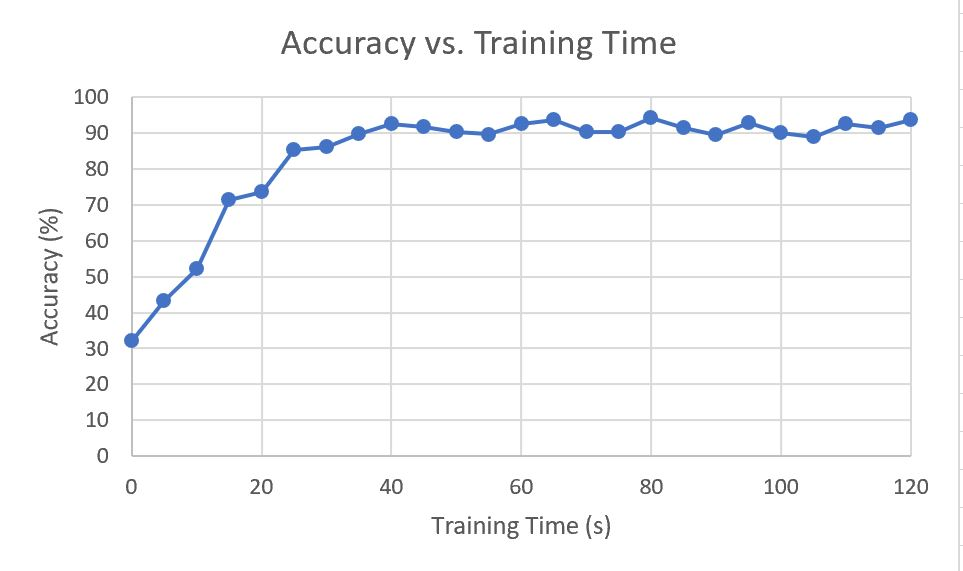

## Improvements

This model can be improved by testing different numbers of hidden layers and/or hidden neurons. Also, increasing the size of the training set will reduce the error of the model and minimize overfitting. 